### DTSA 5510 Unsupervised Algorithms in Machine Learning - Mini Project <br>

Project Title: BBC News Category Prediction: Unsupervised vs. Supervised Approaches<br>
Date: 2023 Oct 17 <br>
Author: Tsai-Yun Li <br>
Course Lecturer: Geena Kim <br>
Orginzation: University of Colorado Boulder <br>
Kaggle Competition Name: BBC News Classification - News Articles Categorization <br>
GitHub Repository Link: https://github.com/TsaiYunLi/ML2-Mini-Project_TsaiYunLi

## Table of Contents
- [1. Unsupervised vs. Supervised Learning Problem Description](#unsupervised-vs-supervised-learning-problem-description)
- [2. Data Description](#data-description)
- [3. Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)
  - [3.1 Basic EDA: Inspecting Features of the Dataframe](#3.1-basic-eda-inspecting-features)
  - [3.2 Basic EDA: Inspecting the Raw News Article Text](#3.2-basic-eda-inspecting-raw-text)
  - [3.3 Basic EDA: Basic Transformations of the News Article Texts](#3.3-basic-eda-transformations)
  - [3.4 More EDA: NLP Transformations of the News Article Texts](#3.4-more-eda-nlp-transformations)
- [4. Unsupervised Model Building, Training: None-negative Matrix Factorization (NMF)](#unsupervised-model-building-nmf)
- [5. Supervised Model Building and Training: Logistic Regression (LR)](#supervised-model-building-lr)
- [6. Model Evaluation and Comparison](#model-evaluation-and-comparison)
  - [6.1 Evaluation of the Unsupervised Approach: Hybrid Model TFIDF_NMF_LR](#6.1-evaluation-of-the-unsupervised-approach-hybrid-model-tfidf_nmf_lr)
  - [6.2 Evaluation of the Supervised Approach: Hybrid Model TFIDF_LR](#6.2-evaluation-of-the-supervised-approach-hybrid-model-tfidf_lr)
- [7. Discussion and Conclusion](#discussion-and-conclusion)
- [8. Refernces](#references)


### 1. Unsupervised vs. Supervised Learning Problem Description
<a id="unsupervised-vs-supervised-learning-problem-description"></a>
This is a project for the course "DTSA 5510 Unsupervised Algorithms in Machine Learning." In this project I will predict BBC news article categories using Kaggle datasets (see section 8 for reference) through machine learning techniques, including:
1. TFIDF_NMF_LR model: a combination of (1) a natural language processing vectorizer, term frequency–inverse document frequency (TF-IDF), (2) an unsupervised dimension reduction approach, none-negative matrix factorization (NMF), as required, and (3) a supervised classifier, logistic regression (LR) <br>

Note that I did not use an unsupervised classifier here, because it is not guaranteed to group the articles into the predefined news categories. It could group them by other latent features. Besides, it might not produce interpretable lables. In other words, a supervised classifier can map the news articles in the test dataset to the predefined categories passed into the model during its training phase, which is the main task of this project. While, The selection of LR as the supervised classifier, is merely for its simplicity, to save computer resources, and to cut the run time of the model.<br>

2. TFIDF_LR model: a combination of (1) a natural language processing vectorizer, term frequency–inverse document frequency (TF-IDF), and (2) a supervised classifier, logistic regression (LR)

Since the NMF model is combined with an LR classifier, it is logical to build an LR model here for a comparison of model performance in later sections. While, the choice of TF-IDF vectorizer for the news article text is actually decided after doing the exploratory data analysis (see section 3 and 4).<br> 

I will compare the performance of these two models, one with and one without NMF, using both quantitative and qualitative evaluation metrics (see section 6):
1. Since there is no prelabled categories in the provided test dataset, quantitative evaluation can only be done for prediction using the provided training dataset, including metrics such as precision, recall, F1-score, missclassification instances, confusion matrix for each category, as well as the overall accuracy.

2. For the same reason, prediction using the test dataset can only be evaluated with qualitative evaluation metrics. I will inspect the content of two random news articles from the test dataset, and see if its content does match its predicted categories.

Please see the following section for details of the datasets.

### 2. Data Description
<a id='2-data-description'></a>
As mentioned above, the datasets used in this project are from Kaggle (see section 8 for reference), including a training dataset 'BBC News Train.csv,' named as BBCtrain_data here, with 1490 rows and 3 columns, and a test dataset 'BBC News Test.csv,' named as BBCtest_data here, with 735 rows and 2 columns. Each row is an instance of BBC news article. The training set has columns 'ArticleID,' 'Text,' and 'Category'. While, the test set only has columns "ArticleID," and "Text." <br>

Column name and value:
1. ArticleId: a unique id for each BBC news article
2. Article: the raw text of each BBC news article, header included
3. Category: the cateogry of each BBC news article based on its content's topic, which could be 'tech', 'business', 'sport', 'entertainment', or 'politics'

In this section, I will inspect the datasets' basic features introduced above.

In [1]:
#importing and loading the datasets downloaded from Kaggle
import pandas as pd

BBCtrain_data = pd.read_csv('https://raw.githubusercontent.com/TsaiYunLi/ML2-Mini-Project_TsaiYunLi/main/Kaggle_BBC%20News_Train.csv')
BBCtest_data = pd.read_csv('https://raw.githubusercontent.com/TsaiYunLi/ML2-Mini-Project_TsaiYunLi/main/Kaggle_BBC%20News_Test.csv')

In [2]:
print('BBCtrain_data shape =', BBCtrain_data.shape)
print('BBCtrain_data head:')
BBCtrain_data.head()

BBCtrain_data shape = (1490, 3)
BBCtrain_data head:


,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [3]:
unique_categories = BBCtrain_data['Category'].value_counts()
print("There are these unique categories in BBCtrain_data:", unique_categories)

There are these unique categories in BBCtrain_data: sport            346
business         336
politics         274
entertainment    273
tech             261
Name: Category, dtype: int64


In [4]:
print('BBCtest_data shape =', BBCtest_data.shape)
print('BBCtest_data head:')
BBCtest_data.head()

BBCtest_data shape = (735, 2)
BBCtest_data head:


,ArticleId,Text
0,1018,qpr keeper day heads for preston queens park r...
1,1319,software watching while you work software that...
2,1138,d arcy injury adds to ireland woe gordon d arc...
3,459,india s reliance family feud heats up the ongo...
4,1020,boro suffer morrison injury blow middlesbrough...


### 3.  Exploratory Data Analysis (EDA): Data Inspection, Visualization, Cleaning, and Transformation
<a id='3-exploratory-data-analysis-eda'></a>
 
In this section, I will perform an exploratory data analysis on the datasets BBCtrain_data and BBCtest_data, including further inspection on the datasets, visualizations of their features. Most importantly, I will prepare the datasets for model-training in later sections by doing some data cleaning and data transformation. <br>

There are four subsections in this section, from basic to more advanced EDA: <br>
3.1 Basic EDA: Inspecting Features of the Dataframe <br>
3.2 Basic EDA: Inspecting the Raw News Article Text <br>
3.3 Basic EDA: Basic Transformations of the News Article Texts <br>
3.4 More EDA: NLP Transformations of the News Article Texts <br>

A short summary will be provided at the end of each subsection.

##### 3.1 Basic EDA: Inpecting Features of the Dataframe
<a id='31-basic-eda-inspecting-features-of-the-dataframe'></a>

In [5]:
# checking for null values and data type in BBCtrain_data
print("checking for null values and data type in BBCtrain_data:")
BBCtrain_data.info()

checking for null values and data type in BBCtrain_data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB


In [6]:
# checking for null values and data type in BBCtest_data
print("checking for null values and data type in BBCtest_data:")
BBCtest_data.info()

checking for null values and data type in BBCtest_data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  735 non-null    int64 
 1   Text       735 non-null    object
dtypes: int64(1), object(1)
memory usage: 11.6+ KB


In [7]:
# checking for duplicated rows in BBCtrain_data
train_duplicates = BBCtrain_data.duplicated().sum()
print("number of duplicated rows in BBCtrain_data:", train_duplicates)

number of duplicated rows in BBCtrain_data: 0


In [8]:
# checking for duplicated rows in BBCtest_data
test_duplicates = BBCtest_data.duplicated().sum()
print("number of duplicated rows in BBCtest_data:", test_duplicates)

number of duplicated rows in BBCtest_data: 0


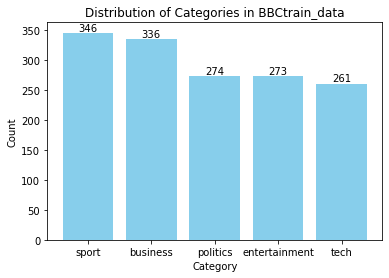

In [9]:
# visualizing the distribution of news article categories in BBCtrain_data
import matplotlib.pyplot as plt
train_category_counts = BBCtrain_data['Category'].value_counts()
hitogram_bars = plt.bar(train_category_counts.index, train_category_counts.values, color='skyblue')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Categories in BBCtrain_data')

for hitogram_bar in hitogram_bars:
    yval = hitogram_bar.get_height()
    plt.text(hitogram_bar.get_x() + hitogram_bar.get_width()/2, yval + 0.05, round(yval, 2), va='bottom', ha='center')
    
plt.show()

In [10]:
# checking if BBCtrain_data has a rather balanced mix of categories
train_category_mean = train_category_counts.mean()
train_category_std = round(train_category_counts.std(), 0)

print("Mean count of articles per category in BBCtrain_data:", train_category_mean)
print("Standard deviation of article counts per category in BBCtrain_data:", train_category_std)

Mean count of articles per category in BBCtrain_data: 298.0
Standard deviation of article counts per category in BBCtrain_data: 40.0


##### Summary for Section 3.1:
1. There is neither null nor duplicated data in BBCtrain_data and BBCtest_data. 
2. Due to the purpose of this project, there is no need to do statistical analysis on column 'ArticleId' and 'Text' in BBCtrain_data or BBCtest_data. 
3. The distribution of 'Category' in BBCtrain_data is pretty balanced, with an average of 298 +- standard deviation 40 articles per category. The number of articles per category in BBCtrain_data is: 346 'sprot,' 336 'business,' 274 'politics,' 273 'entertainment,' and 261' tech.'

##### 3.2 Basic EDA: Inspecting the Raw News Article Text
<a id='32-basic-eda-inspecting-the-raw-news-article-text'></a>

In [11]:
# inspecting the raw text from a random row in BBCtrain_data 
train_rand_row = BBCtrain_data.sample(n=1, random_state=42)
print(train_rand_row['Text'].values[0])

wal-mart is sued over rude lyrics the parents of a 13-year-old girl are suing us supermarket giant wal-mart over a cd by rock group evanescence that contains swear words.  the lawsuit  filed in washington county  alleges wal-mart deceived customers by not putting warning labels on the cover. trevin skeens alleges wal-mart knew of the offending word because it had censored it on its music sales website. wal-mart said it was investigating the claims but had no plans to pull the cd. wal-mart has a policy of not stocking cds which carry parental advisory labels. mr skeens said he bought the anywhere but home cd for his daughter and was shocked to hear the swearing when it was played in their car.   i don t want any other families to get this  expecting it to be clean. it needs to be removed from the shelves to prevent other children from hearing it   said mr skeens of brownsville. the lawsuit seeks to force wal-mart to censor the music or remove it from its stores in maryland. it also seek

In [12]:
# inspecting the raw text from a random row in BBCtest_data 
test_rand_row = BBCtest_data.sample(n=1, random_state=42)
print(test_rand_row['Text'].values[0])

golden rule  intact  says ex-aide chancellor gordon brown will meet his golden economic rule  with a margin to spare   according to his former chief economic adviser.  formerly one of mr brown s closest treasury aides  ed balls hinted at a budget giveaway on 16 march. he said he hoped more would be done to build on current tax credit rules. any rate rise ahead of an expected may election would not affect the labour party s chances of winning  he added. last july  mr balls won the right to step down from his treasury position and run for parliament  defending the labour stronghold of normanton in west yorkshire.  mr balls rejected the allegation that mr brown had been sidelined in the election campaign  saying he was playing a  different  role to the one he played in the last two elections. he rejected speculation that mr brown was considering becoming foreign secretary  saying his recent travels had been linked to efforts to boost international development. gordon brown s decision to a

In [13]:
# computing average, max, min word count for the raw texts in BBCtrain_data 
BBCtrain_raw_avg = BBCtrain_data['Text'].apply(lambda x: len(str(x).split())).mean()
BBCtrain_raw_max = BBCtrain_data['Text'].apply(lambda x: len(str(x).split())).max()
BBCtrain_raw_min = BBCtrain_data['Text'].apply(lambda x: len(str(x).split())).min()
print("raw text average word count in BBCtrain_data:", BBCtrain_raw_avg)
print("raw text max word count in BBCtrain_data:", BBCtrain_raw_max)
print("raw text min word count in BBCtrain_data:", BBCtrain_raw_min, "\n")

# computing average, max, min word count for the raw texts in BBCtest_data 
BBCtest_raw_avg = BBCtest_data['Text'].apply(lambda x: len(str(x).split())).mean()
BBCtest_raw_max = BBCtest_data['Text'].apply(lambda x: len(str(x).split())).max()
BBCtest_raw_min = BBCtest_data['Text'].apply(lambda x: len(str(x).split())).min()
print("raw text average word count in BBCtest_data:", BBCtest_raw_avg)
print("raw text max word count in BBCtest_data:", BBCtest_raw_max)
print("raw text min word count in BBCtest_data:", BBCtest_raw_min)

raw text average word count in BBCtrain_data: 385.01275167785235
raw text max word count in BBCtrain_data: 3345
raw text min word count in BBCtrain_data: 90 

raw text average word count in BBCtest_data: 401.0040816326531
raw text max word count in BBCtest_data: 4492
raw text min word count in BBCtest_data: 126


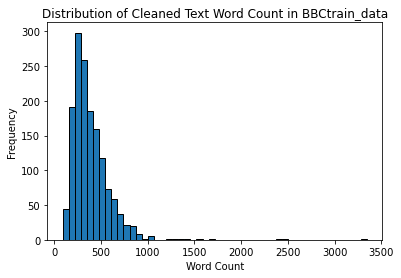

In [14]:
# visualizing the word count distribution for the raw texts in BBCtrain_data
BBCtrain_cleaned_word_count = BBCtrain_data['Text'].apply(lambda x: len(str(x).split()))
plt.hist(BBCtrain_cleaned_word_count, bins = 50, edgecolor='k')
plt.title('Distribution of Cleaned Text Word Count in BBCtrain_data')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

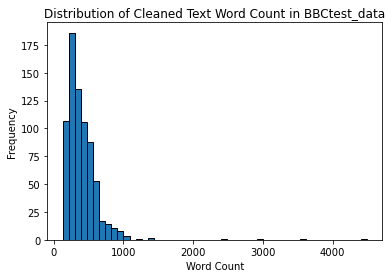

In [15]:
# visualizing the word count distribution for the raw texts in BBCtest_data
BBCtest_cleaned_word_count = BBCtest_data['Text'].apply(lambda x: len(str(x).split()))
plt.hist(BBCtest_cleaned_word_count, bins = 50, edgecolor='k')
plt.title('Distribution of Cleaned Text Word Count in BBCtest_data')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

##### Summary for Section 3.2:
1. The raw news articles texts are in natural English language paragraphs that consists of uncapitalized sentences, with punctuations, numbers, and extra leading/trailing spaces, which will be removed in the next section.
2. The raw news articles texts in BBCtrain_data have an average word count of about 385. The longest one has 3345 words, and the shortest one 90 words.  
3. The raw news articles texts in BBCtest_data have an average word count of about 401. The longest one has 4492 words, and the shortest one 126 words.
4. The statistical features in points 2 and 3 are visualized in histograms.
5. The outlier texts, the very long and very short ones, do not need to be removed, because they are legit, published news articles, which should not include inconsistant or irrelavent content.

##### 3.3 Basic EDA: Basic Transformations of the News Article Texts
<a id='33-basic-eda-basic-transformations-of-the-news-article-texts'></a>

In [16]:
# creating a new column "Train_Text_Cleaned" with the same values as in "Text" in BBCtrain_data
# prepared for doing some nlp preprocessing later
BBCtrain_data['Train_Text_Cleaned'] = BBCtrain_data['Text']

# creating a new column "Test_Text_Cleaned" with the same values as in "Text" in BBCtest_data
# prepared for doing some nlp preprocessing later
BBCtest_data['Test_Text_Cleaned'] = BBCtest_data['Text']

In [17]:
## removing punctuations
# removing punctuations from "Train_Text_Cleaned" in BBCtrain_data
BBCtrain_data['Train_Text_Cleaned'] = BBCtrain_data['Train_Text_Cleaned'].str.replace(r'[^\w\s]', '', regex=True)

# remove punctuations from "Test_Text_Cleaned" in BBCtest_data
BBCtest_data['Test_Text_Cleaned'] = BBCtest_data['Test_Text_Cleaned'].str.replace(r'[^\w\s]', '', regex=True)

In [18]:
## removing numbers
# removing numbers from "Train_Text_Cleaned" in BBCtrain_data
BBCtrain_data['Train_Text_Cleaned'] = BBCtrain_data['Train_Text_Cleaned'].str.replace(r'\d+', '', regex=True)

# removing numbers from "Test_Text_Cleaned" in BBCtest_data
BBCtest_data['Test_Text_Cleaned'] = BBCtest_data['Test_Text_Cleaned'].str.replace(r'\d+', '', regex=True)

In [19]:
## removing extra leading/trailing spaces
# removing extra leading/trailing spaces from "Train_Text_Cleaned" in BBCtrain_data
BBCtrain_data['Train_Text_Cleaned'] = BBCtrain_data['Train_Text_Cleaned'].str.replace(r'\s+', ' ', regex=True).str.strip()


# removing extra leading/trailing spaces from "Test_Text_Cleaned" in BBCtest_data
BBCtest_data['Test_Text_Cleaned'] = BBCtest_data['Test_Text_Cleaned'].str.replace(r'\s+', ' ', regex=True).str.strip()

##### Summary for Section 3.3:
1. The original news article texts are left untouched in column "Text."
2. Punctuations, numbers, and extra leading/trailing spaces are removed from the news article texts in both BBCtrain_data and BBCtest_data, and stored in new columns "Train_Text_Cleaned" and "Test_TExt_Cleaned," in the respective datasets.

##### 3.4 More EDA: NLP Transformations of the News Article Texts
<a id='34-more-eda-nlp-transformations-of-the-news-article-texts'></a>

In [20]:
# libraries for nlp preprocessing
%pip install nltk
import nltk.corpus
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 109.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 761.6/761.6 kB 122.1 MB/s eta 0:00:00

[notice] A new release of pip available: 22.3 -> 23.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [21]:
## nlp preprocessing: remove stop words
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
def remove_stop_words(text):
    words = word_tokenize(text)
    no_stop_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(no_stop_words)


# remove stop words from "Train_Text_Cleaned" in BBCtrain_data
BBCtrain_data['Train_Text_Cleaned'] = BBCtrain_data['Train_Text_Cleaned'].apply(remove_stop_words)
print("BBCtrain_data['Train_Text_Cleaned'] without stop words:", "\n", BBCtrain_data['Train_Text_Cleaned'], "\n")

# remove stop words from "Test_Text_Cleaned" in BBCtest_data
BBCtest_data['Test_Text_Cleaned'] = BBCtest_data['Test_Text_Cleaned'].apply(remove_stop_words)
print("BBCtest_data['Test_Text_Cleaned'] without stop words:", "\n", BBCtest_data['Test_Text_Cleaned'])

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


BBCtrain_data['Train_Text_Cleaned'] without stop words: 
 0       worldcom exboss launches defence lawyers defen...
1       german business confidence slides german busin...
2       bbc poll indicates economic gloom citizens maj...
3       lifestyle governs mobile choice faster better ...
4       enron bosses payout eighteen former enron dire...
                              ...                        
1485    double eviction big brother model caprice holb...
1486    dj double act revamp chart show dj duo jk joel...
1487    weak dollar hits reuters revenues media group ...
1488    apple ipod family expands market apple expande...
1489    santy worm makes unwelcome visit thousands web...
Name: Train_Text_Cleaned, Length: 1490, dtype: object 

BBCtest_data['Test_Text_Cleaned'] without stop words: 
 0      qpr keeper day heads preston queens park range...
1      software watching work software monitor every ...
2      arcy injury adds ireland woe gordon arcy ruled...
3      india reliance

In [22]:
## nlp preprocessing: tokenization and lemmatization
nltk.download('punkt')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
def tokenization_then_lemmatization(text):
    tokenized_words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(tokenized_word) for tokenized_word in tokenized_words]
    return ' '.join(lemmatized_words)

# lemmatization of word tokens in "Train_Text_Cleaned" in BBCtrain_data
BBCtrain_data['Train_Text_Cleaned'] = BBCtrain_data['Train_Text_Cleaned'].apply(tokenization_then_lemmatization)


# lemmatization of word tokens in "Test_Text_Cleaned" in BBCtest_data
BBCtest_data['Test_Text_Cleaned'] = BBCtest_data['Test_Text_Cleaned'].apply(tokenization_then_lemmatization)

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...


In [23]:
# inspecting the cleaned text from a random row in BBCtrain_data
cleaned_train_rand_row = BBCtrain_data.sample(n=1, random_state=42)
print(cleaned_train_rand_row['Train_Text_Cleaned'].values[0])

walmart sued rude lyric parent yearold girl suing u supermarket giant walmart cd rock group evanescence contains swear word lawsuit filed washington county alleges walmart deceived customer putting warning label cover trevin skeens alleges walmart knew offending word censored music sale website walmart said investigating claim plan pull cd walmart policy stocking cd carry parental advisory label mr skeens said bought anywhere home cd daughter shocked hear swearing played car want family get expecting clean need removed shelf prevent child hearing said mr skeens brownsville lawsuit seek force walmart censor music remove store maryland also seek damage every customer bought cd maryland walmarts also naming record label windup record distributor bmg entertainment legal action walmart set high standard would possible eliminate every image word topic individual might find objectionable walmart spokesman guy whitcomb told heraldmail hagerstown


In [24]:
# inspecting the cleaned text from a random row in BBCtest_data
cleaned_test_rand_row = BBCtest_data.sample(n=1, random_state=42)
print(cleaned_test_rand_row['Test_Text_Cleaned'].values[0])

golden rule intact say exaide chancellor gordon brown meet golden economic rule margin spare according former chief economic adviser formerly one mr brown closest treasury aide ed ball hinted budget giveaway march said hoped would done build current tax credit rule rate rise ahead expected may election would affect labour party chance winning added last july mr ball right step treasury position run parliament defending labour stronghold normanton west yorkshire mr ball rejected allegation mr brown sidelined election campaign saying playing different role one played last two election rejected speculation mr brown considering becoming foreign secretary saying recent travel linked effort boost international development gordon brown decision announce date budget trip china sensible thing since talking skill investment time mr ball told bbc commenting speculation interest rate rise said within remit bank england monetary policy committee mpc factor potential election rate decision expectati

In [25]:
# computing average, max, min word count for the texts in BBCtrain_data after nlp preprocessing
BBCtrain_raw_avg = BBCtrain_data['Train_Text_Cleaned'].apply(lambda x: len(str(x).split())).mean()
BBCtrain_raw_max = BBCtrain_data['Train_Text_Cleaned'].apply(lambda x: len(str(x).split())).max()
BBCtrain_raw_min = BBCtrain_data['Train_Text_Cleaned'].apply(lambda x: len(str(x).split())).min()
print("text average word count in BBCtrain_data after nlp preprocessing:", BBCtrain_raw_avg)
print("text max word count in BBCtrain_data after nlp preprocessing:", BBCtrain_raw_max)
print("text min word count in BBCtrain_data after nlp preprocessing:", BBCtrain_raw_min, "/n")

# computing average, max, min word count for the texts in BBCtest_data after nlp preprocessing
BBCtest_raw_avg = BBCtest_data['Test_Text_Cleaned'].apply(lambda x: len(str(x).split())).mean()
BBCtest_raw_max = BBCtest_data['Test_Text_Cleaned'].apply(lambda x: len(str(x).split())).max()
BBCtest_raw_min = BBCtest_data['Test_Text_Cleaned'].apply(lambda x: len(str(x).split())).min()
print("text average word count in BBCtest_data after nlp preprocessing:", BBCtest_raw_avg)
print("text max word count in BBCtest_data after nlp preprocessing:", BBCtest_raw_max)
print("text min word count in BBCtest_data after nlp preprocessing:", BBCtest_raw_min)

text average word count in BBCtrain_data after nlp preprocessing: 212.85704697986577
text max word count in BBCtrain_data after nlp preprocessing: 1632
text min word count in BBCtrain_data after nlp preprocessing: 47 /n
text average word count in BBCtest_data after nlp preprocessing: 220.28843537414966
text max word count in BBCtest_data after nlp preprocessing: 2187
text min word count in BBCtest_data after nlp preprocessing: 69


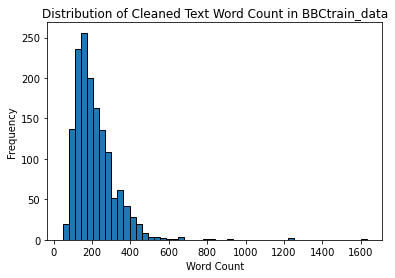

In [26]:
# visualizing the word count distribution for the cleaned text in BBCtrain_data
BBCtrain_cleaned_word_count = BBCtrain_data['Train_Text_Cleaned'].apply(lambda x: len(str(x).split()))
plt.hist(BBCtrain_cleaned_word_count, bins = 50, edgecolor='k')
plt.title('Distribution of Cleaned Text Word Count in BBCtrain_data')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

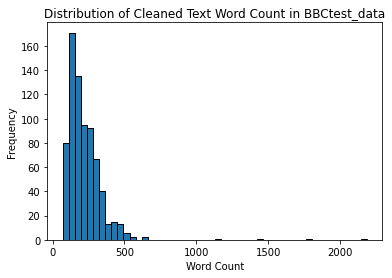

In [27]:
# visualizing the word count distribution for the cleaned text in BBCtest_data
BBCtest_cleaned_word_count = BBCtest_data['Test_Text_Cleaned'].apply(lambda x: len(str(x).split()))
plt.hist(BBCtest_cleaned_word_count, bins = 50, edgecolor='k')
plt.title('Distribution of Cleaned Text Word Count in BBCtest_data')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

##### Summary for Section 3.4:
In order to facilitate modeling in later sections, several nlp preprocessing steps are done for the news article texts in both BBCtrain_data and BBCtest_data:
1. Stop words are removed.
2. Paragraphs are tokenized into words.
3. Words are lemmatized.

After these nlp preprocessing steps, I inspected the cleaned texts and found that their lengths have been largely reduced to an average word count of about 213, a max word count of 1632, and a min word count of 47 in BBCtrain_data, and an average word count of about 220, a max word count of 2187, and a min word count of 69 in BBCtest_data. The concentrated texts will improve model performance and the accuracy of category prediction.

### 4. Unsupervised Model Building, Training: None-negative Matrix Factorization (NMF)
<a id='4-unsupervised-model-building-training-none-negative-matrix-factorization-nmf'></a>
In this section, I will build a model with TF-IDF vectorizer, which will vectorize the strings of lemmas of the news articles into vectors, a unsupervised domain reduction NF model, and a supervised classifier LR. At the same time, I will do hyperparameter tuning using GridsearchCV with 5-fold cross-validations to get the best hyperparamters of the hybrid model. 

The reason why TF-IDF is chosen as the vectorizer here is because that BBCtrain_data is rather small, since it consists of 1490 news articles, with an average length of 212 lemmas and an approximately normal distribution (see sections 2 and 3). TF-IDF is efficient, requires less intense computer resources, and is adequate for small dataset and simple models like NMF and LR. It will generate sparse matrixes but this is mitigated by size of dataset, which is rather small.

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# defining the TFIDF_NMF_LR pipeline
TFIDF_NMF_LR_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()), # dealt with 'stop words' before, so excluded this hyperparameter  
    ('nmf', NMF(n_components=5, random_state=42)), # 5 categories: sport, business, politics, entertainment, tech  
    ('clf', LogisticRegression(max_iter=200))
])

# defining the TFIDF_NMF_LR hyperparameters and their possible values
TFIDF_NMF_LR_param_grid = {
    'tfidf__max_features': [3000, 5000],  
    'tfidf__ngram_range': [(1, 1), (1, 2)], 
    'nmf__alpha': [0.0, 0.1],
    'nmf__l1_ratio': [0.0, 0.25],
    'clf__C': [0.1, 1],
    'clf__penalty': ['l1', 'l2'],
}

# doing grid search for TFIDF_NMF_LR with 5-fold cross-validation
TFIDF_NMF_LR_grid_search = GridSearchCV(TFIDF_NMF_LR_pipeline, TFIDF_NMF_LR_param_grid, cv=5, verbose=1, n_jobs=-1)
TFIDF_NMF_LR_grid_search.fit(BBCtrain_data['Train_Text_Cleaned'], BBCtrain_data['Category'])

print("TFIDF_NMF_LR Best parameters:", TFIDF_NMF_LR_grid_search.best_params_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:  2.1min finished


TFIDF_NMF_LR Best parameters: {'clf__C': 1, 'clf__penalty': 'l2', 'nmf__alpha': 0.0, 'nmf__l1_ratio': 0.0, 'tfidf__max_features': 3000, 'tfidf__ngram_range': (1, 2)}


In [29]:
# best TFIDF vectorizer tuned together with NMF and LR
TFIDF_NMF_LR_vectorizer = TFIDF_NMF_LR_grid_search.best_estimator_.named_steps['tfidf']
print("best TFIDF vectorizer tuned together with NMF and LR:", TFIDF_NMF_LR_vectorizer, "\n")

# best LR classifer tuned together with TFIDF and NMF
TFIDF_NMF_LR_classifier = TFIDF_NMF_LR_grid_search.best_estimator_.named_steps['clf']
print("best LR classifer tuned together with TFIDF and NMF:", TFIDF_NMF_LR_classifier, "\n")

# best NMF
NMF_model = TFIDF_NMF_LR_grid_search.best_estimator_.named_steps['nmf']
print("best NMF model:", NMF_model)

best TFIDF vectorizer tuned together with NMF and LR: TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=3000,
                min_df=1, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None) 

best LR classifer tuned together with TFIDF and NMF: LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) 

best NMF model: NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ra

In [30]:
## the task
# predicting the news article categories in BBCtest_data using the TFIDF_NMF_LR model
TFIDF_NMF_LR_y_pred_test = TFIDF_NMF_LR_grid_search.predict(BBCtest_data['Test_Text_Cleaned'])

# adding the predictions to BBCtest_data
BBCtest_data['NMFtest_PredictedCategory'] = TFIDF_NMF_LR_y_pred_test

# displaying BBCtest_data with the predicted categories
print(BBCtest_data[['ArticleId', 'NMFtest_PredictedCategory']])

     ArticleId NMFtest_PredictedCategory
0         1018                     sport
1         1319                      tech
2         1138                     sport
3          459                  business
4         1020                     sport
..         ...                       ...
730       1923                  business
731        373             entertainment
732       1704                      tech
733        206                  business
734        471                  politics

[735 rows x 2 columns]


In [31]:
## eyeballing the prediction power of the TFIDF_NMF_LR model
## comparing the predicted categories and their ground truth categories in BBCtrain_data

# predicting the news article categories in BBCtrain_data using the TFIDF_NMF_LR model
TFIDF_NMF_LR_X_pred_train = TFIDF_NMF_LR_grid_search.predict(BBCtrain_data['Train_Text_Cleaned'])

# adding the predictions to BBCtest_data
BBCtrain_data['NMFtrain_PredictedCategory'] = TFIDF_NMF_LR_X_pred_train

# displaying BBCtrain_data with the predicted and ground truth categories
print(BBCtrain_data[['ArticleId', 'NMFtrain_PredictedCategory', 'Category']])

      ArticleId NMFtrain_PredictedCategory       Category
0          1833                   business       business
1           154                   business       business
2          1101                   business       business
3          1976                       tech           tech
4           917                   business       business
...         ...                        ...            ...
1485        857              entertainment  entertainment
1486        325              entertainment  entertainment
1487       1590                   business       business
1488       1587                       tech           tech
1489        538                       tech           tech

[1490 rows x 3 columns]


##### Summary for the TFIDF_NMF_LR Model:
1. The best TFIDF vectorizer, tuned together with NMF and LR, is TFIDF_NMF_LR_vectorizer with hyperparamters 'tfidf__max_features': 3000, and 'tfidf__ngram_range': (1, 2).
2. The best NMF, tuned together with TFIDF and LR, is NMF_model with hyperparameters, 'nmf__alpha': 0.0, and 'nmf__l1_ratio': 0.0. I set the random_state to 42 to ensure the same random results, and 'n_components'to 5 since there are 5 category labels in BBCtrain_data.
3. The best LR classifer, tuned together with TFIDF and NMF, is TFIDF_NMF_LR_classifier with hyperparameters 'clf__C': 1, and 'clf__penalty': 'l2'. I set max_iter to 200 to cut down the run time.
4. The main task, category prediction for BBCtest_data, is completed, and stored in BBCtest_data['NMFtest_PredictedCategory'].
5. For model evaluation metric in a later section, category prediction is also done for BBCtrain_dataset, and stored in BBCtrain_data['NMFtrain_PredictedCategory'].

### 5. Supervised Model Building and Training: Logistic Regression (LR)
<a id='5-supervised-model-building-and-training-logistic-regression-lr'></a>
In this section, I will build a model with TF-IDF vectorizer, which will vectorize the strings of lemmas of the news articles into vectors, and a supervised classifier LR. At the same time, I will do hyperparameter tuning using GridsearchCV with 5-fold cross-validations to get the best hyperparamters of the hybrid model. 

The reason why TF-IDF is chosen as the vectorizer here is the same as the one explained in section 4.

In [32]:
# defining the TFIDF_LR pipeline
TFIDF_LR_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression(max_iter=200))
])

# defining the TFIDF_SVM hyperparameters and their possible values
TFIDF_LR_param_grid = {
    'tfidf__max_features': [3000, 5000],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'clf__C': [0.1, 1],
    'clf__penalty': ['l1', 'l2']
}

# doing grid search for TFIDF_SVM with 5-fold cross-validation
TFIDF_LR_grid_search = GridSearchCV(TFIDF_LR_pipeline, TFIDF_LR_param_grid, cv=5, verbose=1, n_jobs=-1)
TFIDF_LR_grid_search.fit(BBCtrain_data['Train_Text_Cleaned'], BBCtrain_data['Category'])
print("TFIDF_LR Best parameters: ", TFIDF_LR_grid_search.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   30.2s finished


TFIDF_LR Best parameters:  {'clf__C': 1, 'clf__penalty': 'l2', 'tfidf__max_features': 5000, 'tfidf__ngram_range': (1, 1)}


In [33]:
# best TFIDF vectorizer used together with LR
TFIDF_LR_vectorizer = TFIDF_LR_grid_search.best_estimator_.named_steps['tfidf']
print("best TFIDF vectorizer used together with LR:", TFIDF_LR_vectorizer, "\n")

# best LR classifier used together with TFIDF
LR_model = TFIDF_LR_grid_search.best_estimator_.named_steps['clf']
print("best LR model used together with TFIDF:", LR_model)

best TFIDF vectorizer used together with LR: TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=5000,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None) 

best LR model used together with TFIDF: LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [34]:
# predicting the news article categories in BBCtest_data using the TFIDF_LR model
TFIDF_LR_y_pred_test = TFIDF_LR_grid_search.predict(BBCtest_data['Test_Text_Cleaned'])

# adding the predictions to BBCtest_data
BBCtest_data['LRtest_PredictedCategory'] = TFIDF_LR_y_pred_test

# displaying BBCtest_data with the predicted categories
print(BBCtest_data[['ArticleId', 'LRtest_PredictedCategory']])

     ArticleId LRtest_PredictedCategory
0         1018                    sport
1         1319                     tech
2         1138                    sport
3          459                 business
4         1020                    sport
..         ...                      ...
730       1923                 business
731        373            entertainment
732       1704                 politics
733        206                 business
734        471                 politics

[735 rows x 2 columns]


In [35]:
## eyeballing the prediction power of the TFIDF_LR model
## comparing the predicted categories and their ground truth categories in BBCtrain_data

# predicting the news article categories in BBCtrain_data using the TFIDF_LR model
TFIDF_LR_X_pred_train = TFIDF_LR_grid_search.predict(BBCtrain_data['Train_Text_Cleaned'])

# adding the predictions to BBCtrain_data
BBCtrain_data['LRtrain_PredictedCategory'] = TFIDF_LR_X_pred_train

# displaying BBCtrain_data with the predicted and ground truth categories
print(BBCtrain_data[['ArticleId', 'LRtrain_PredictedCategory', 'Category']])

      ArticleId LRtrain_PredictedCategory       Category
0          1833                  business       business
1           154                  business       business
2          1101                  business       business
3          1976                      tech           tech
4           917                  business       business
...         ...                       ...            ...
1485        857             entertainment  entertainment
1486        325             entertainment  entertainment
1487       1590                  business       business
1488       1587                      tech           tech
1489        538                      tech           tech

[1490 rows x 3 columns]


##### Summary for the TFIDF_LR Model:
1. The best TFIDF vectorizer, tuned together with NMF and LR, is TFIDF_LR_vectorizer with hyperparamters 'tfidf__max_features': 5000, and 'tfidf__ngram_range': (1, 1), which is different from TFIDF_NMF_LR_vectorizer in section 4.
2. The best LR model, tuned together with TFIDF and NMF, is TFIDF_LR_classifier with hyperparameters 'clf__C': 1, and 'clf__penalty': 'l2', which is the same as the TFIDF_NMF_LR_classifier in section 4. I set max_iter to 200 to cut down the run time.
3. The main task, category prediction for BBCtest_data, is completed, and stored in BBCtest_data['NMFtest_PredictedCategory'].
4. For model evaluation metric in a later section, category prediction is also done for BBCtrain_dataset, and stored in BBCtrain_data['NMFtrain_PredictedCategory'].

### 6. Model Evaluation and Comparison: Unsupervised vs. Supervised Models
<a id='6-model-evaluation-and-comparison-unsupervised-vs-supervised-models'></a>
In this section, I will compare the performance of the two hybrid models, TFIDF_NMF_LR and TFIDF_LR, one with and one without NMF, using both quantitative and qualitative evaluation metrics:

Since there is no prelabled categories in the provided test dataset, quantitative evaluation can only be done for prediction using the provided training dataset, including metrics such as precision, recall, F1-score, missclassification instances, confusion matrix for each category, as well as the overall accuracy.

For the same reason, prediction using the test dataset can only be evaluated with qualitative evaluation metrics. I will inspect the content of two random news articles from the test dataset, and see if its content does match its predicted categories.

I will include a comparison of the two hybrid models at the end of this entire section.

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report

##### 6.1 Evaluation of the Unsupervised Approach: Hybrid Model TFIDF_NMF_LR
<a id='61-evaluation-of-the-unsupervised-non-negative-matrix-factorization-model-nmf'></a>

In [37]:
## quantitative evaluation metrics
TFIDF_NMF_LR_X_true_train = BBCtrain_data['Category']
TFIDF_NMF_LR_X_pred_train = BBCtrain_data['NMFtrain_PredictedCategory']

print("Classification Report - TFIDF_NMF_LR:")
print(classification_report(TFIDF_NMF_LR_X_true_train, TFIDF_NMF_LR_X_pred_train))

Classification Report - TFIDF_NMF_LR:
               precision    recall  f1-score   support

     business       0.85      0.97      0.90       336
entertainment       0.96      0.83      0.89       273
     politics       0.96      0.86      0.91       274
        sport       0.92      0.99      0.96       346
         tech       0.91      0.88      0.89       261

     accuracy                           0.91      1490
    macro avg       0.92      0.91      0.91      1490
 weighted avg       0.92      0.91      0.91      1490



In [38]:
## quantitative evaluation metrics
# confusion matrix of TFIDF_NMF_LR
import numpy as np
NMF_confusionMatrix = confusion_matrix(TFIDF_NMF_LR_X_true_train, TFIDF_NMF_LR_X_pred_train)
print("TFIDF_NMF_LR confusion matrix:", NMF_confusionMatrix, "\n")

NMF_acc = np.trace(NMF_confusionMatrix) / np.sum(NMF_confusionMatrix) #sum diagonal / sum total
print("TFIDF_NMF_LR overall accuracy:", NMF_acc)

TFIDF_NMF_LR confusion matrix: [[325   1   4   1   5]
 [ 16 227   4  11  15]
 [ 31   0 236   4   3]
 [  1   2   0 343   0]
 [ 11   7   1  12 230]] 

TFIDF_NMF_LR overall accuracy: 0.9134228187919463


TFIDF_NMF_LR confusion matrix diagonal values: <br>
325 correct predictions for class 1 <br>
227 correct predictions for class 2 <br>
236 correct predictions for class 3 <br>
343 correct predictions for class 4 <br>
230 correct predictions for class 5 <br>

TFIDF_NMF_LR confusion matrix off-diagonal values: <br>
For class 1: <br>
1 was misclassified as class 2 <br>
4 were misclassified as class 3 <br>
1 was misclassified as class 4 <br>
5 were misclassified as class 5 <br>

For class 2: <br>
16 were misclassified as class 1 <br>
4 were misclassified as class 3 <br>
11 were misclassified as class 4 <br>
15 were misclassified as class 5 <br>

For class 3: <br>
31 were misclassified as class 1 <br>
4 were misclassified as class 4 <br>
3 were misclassified as class 5 <br>

For class 4: <br>
1 was misclassified as class 1 <br>
2 were misclassified as class 2 <br>

For class 5: <br>
11 were misclassified as class 1 <br>
7 were misclassified as class 2 <br>
1 was misclassified as class 3 <br>
12 were misclassified as class 4 <br>

Overall accuracy: 0.9134228187919463

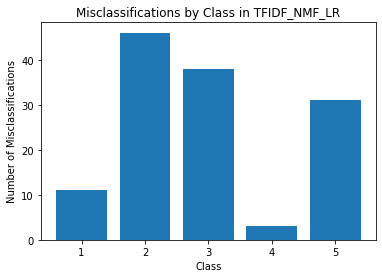

In [39]:
# visualizing the distribution of the misclassifications in TFIDF_NMF_LR
TFIDF_NMF_LR_misclassifications = NMF_confusionMatrix.sum(axis=1) - np.diag(NMF_confusionMatrix)
plt.bar(range(1, len(TFIDF_NMF_LR_misclassifications) + 1), TFIDF_NMF_LR_misclassifications)
plt.xlabel('Class')
plt.ylabel('Number of Misclassifications')
plt.title('Misclassifications by Class in TFIDF_NMF_LR')
plt.show()

In [40]:
# double-ckecking TFIDF_NMF_LR class labels
print(TFIDF_NMF_LR_classifier.classes_)

['business' 'entertainment' 'politics' 'sport' 'tech']


In [41]:
## qualitative evaluation metrics, sample 1
# inspecting the content of a random news article in 'Text' in BBCtest_data
# and see if it does match its predicted categories 'NMFtest_PredictedCategory'
import random
random.seed(42)
random_index = random.choice(BBCtest_data.index)

print("1. the content of randomly selected news article in BBCtest_data :", "\n")
print(BBCtest_data.loc[random_index, 'Text'], "\n")

print("2. the predicted category using TFIDF_NF_LR for the article:", "\n")
print(BBCtest_data.loc[random_index, 'NMFtest_PredictedCategory'])

1. the content of randomly selected news article in BBCtest_data : 

tories opposing 24-hour drinking the tories say plans to extend pub opening times should be put on hold until binge drinking is under control  despite backing a law change last year.  spokesman david davis said ministers had failed to make his party aware of concern among senior police that plans would cause more anti-social behaviour. notts police chief steve green said innocent people would suffer. but culture secretary tessa jowell said a delay would be  disastrous  and she accused the tories of opportunism. the government would go ahead with the changes which would give police more power to tackle excessive drinking  she added. earlier chief constable green questioned how his officers would be able to practically apply powers allowing them to shut down problem premises.  if you look at the market square in nottingham  if a fight takes place which licensed premises do you go and lay the responsibilty at the door of

In [42]:
## qualitative evaluation metrics, sample 2
# inspecting the content of a random news article in 'Text' in BBCtest_data
# and see if it does match its predicted categories 'NMFtest_PredictedCategory'
import random
random.seed(2023)
random_index = random.choice(BBCtest_data.index)

print("1. the content of randomly selected news article in BBCtest_data :", "\n")
print(BBCtest_data.loc[random_index, 'Text'], "\n")

print("2. the predicted category using TFIDF_NF_LR for the article:", "\n")
print(BBCtest_data.loc[random_index, 'NMFtest_PredictedCategory'])

1. the content of randomly selected news article in BBCtest_data : 

disney backs sony dvd technology a next generation dvd technology backed by sony has received a major boost.  film giant disney says it will produce its future dvds using sony s blu-ray disc technology  but has not ruled out a rival format developed by toshiba. the two competing dvd formats  blu-ray developed by sony and others  and toshiba s hd-dvd  have been courting top film studios for several months. the next generation of dvds promises very high quality pictures and sound  as well as a lot of data. both technologies use a blue laser to write information. it has a shorter wavelength so more data can be stored. disney is the latest studio to announce which technology it is backing in a format battle which mirrors the 1980s betamax versus vhs war. sony lost out to jvc in that fight.  the current battle for hollywood s hearts and minds is a crucial one because high-definition films will bring in billions of revenue 

##### 6.2 Evaluation of the Supervised Approach: Hybrid Model TFIDF_LR
<a id='62-evaluation-of-the-supervised-logistic-regression-lr'></a>

In [43]:
## quantitative evaluation metrics
TFIDF_LR_X_true_train = BBCtrain_data['Category']
TFIDF_LR_X_pred_train = BBCtrain_data['LRtrain_PredictedCategory']

print("Classification Report - TFIDF_LR:")
print(classification_report(TFIDF_LR_X_true_train, TFIDF_LR_X_pred_train))

Classification Report - TFIDF_LR:
               precision    recall  f1-score   support

     business       1.00      1.00      1.00       336
entertainment       1.00      1.00      1.00       273
     politics       1.00      1.00      1.00       274
        sport       1.00      1.00      1.00       346
         tech       0.99      1.00      0.99       261

     accuracy                           1.00      1490
    macro avg       1.00      1.00      1.00      1490
 weighted avg       1.00      1.00      1.00      1490



In [44]:
## quantitative evaluation metrics
# confusion matrix of TFIDF_LR
LR_confusionMatrix = confusion_matrix(TFIDF_LR_X_true_train, TFIDF_LR_X_pred_train)
print("TFIDF_LR confusion matrix:", LR_confusionMatrix, "\n")

LR_acc = np.trace(LR_confusionMatrix) / np.sum(LR_confusionMatrix) #sum diagonal / sum total
print("TFIDF_LR overall accuracy:", LR_acc)

TFIDF_LR confusion matrix: [[335   0   0   0   1]
 [  0 273   0   0   0]
 [  0   0 273   0   1]
 [  1   0   0 345   0]
 [  0   1   0   0 260]] 

TFIDF_LR overall accuracy: 0.9973154362416108


TFIDF_LR confusion matrix diagonal values: <br>
335 correct predictions for class 1 <br>
273 correct predictions for class 2 <br>
273 correct predictions for class 3 <br>
345 correct predictions for class 4 <br>
260 correct predictions for class 5 <br>

TFIDF_LR confusion matrix off-diagonal values: <br>
For class 1: 1 was misclassified as class 5 <br>
For class 2: none <br>
For class 3: 1 was misclassified as class 5 <br>
For class 4: 1 was misclassified as class 1 <br>
For class 5: 1 was misclassified as class 2 <br>

Overall accuracy: 0.9973154362416108

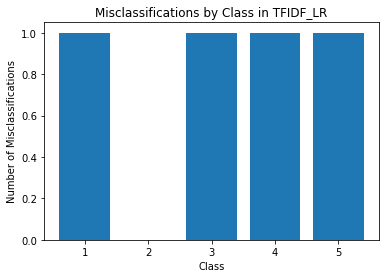

In [45]:
# visualizing the distribution of the misclassifications in TFIDF_LR
TFIDF_LR_misclassifications = LR_confusionMatrix.sum(axis=1) - np.diag(LR_confusionMatrix)

plt.bar(range(1, len(TFIDF_LR_misclassifications) + 1), TFIDF_LR_misclassifications)
plt.xlabel('Class')
plt.ylabel('Number of Misclassifications')
plt.title('Misclassifications by Class in TFIDF_LR')
plt.show()

In [46]:
# double-checking TFIDF_SVM class labels
print(LR_model.classes_)

['business' 'entertainment' 'politics' 'sport' 'tech']


In [47]:
## qualitative evaluation metrics, sample 1
# inspecting the content of a random news article in 'Text' in BBCtest_data
# and see if it does match its predicted categories 'LRtest_PredictedCategory'
import random
random.seed(10)
random_index = random.choice(BBCtest_data.index)

print("1. the content of randomly selected news article in BBCtest_data :", "\n")
print(BBCtest_data.loc[random_index, 'Text'], "\n")


print("2. the predicted category using TFIDF_LR for the article:", "\n")
print(BBCtest_data.loc[random_index, 'LRtest_PredictedCategory'])

1. the content of randomly selected news article in BBCtest_data : 

legendary dutch boss michels dies legendary dutch coach rinus michels  the man credited with developing  total football   has died aged 77.  referred to in the netherlands as  the general   michels led the dutch at the 1974 world cup - when they reached the final only to lose 2-1 to germany. however  he guided his side to the 1988 european championship title with a 2-0 win over the soviet union in the final. michels played for ajax and coached the side to four national titles between 1965-71 and a european cup in 1971. his 1970s dutch team was built around johan cruyff and johan neeskens and introduced the concept of  total football  to the world. the strategy was to foster team coherence and individual imagination - with all players possessing the skills to play in any part of the pitch. cruyff was the on-field organiser of a team whose players rotated in and out of defence at will and was encouraged to play creative

In [48]:
## qualitative evaluation metrics, sample 2
# inspecting the content of a random news article in 'Text' in BBCtest_data
# and see if it does match its predicted categories 'LRtest_PredictedCategory'
import random
random.seed(17)
random_index = random.choice(BBCtest_data.index)

print("1. the content of randomly selected news article in BBCtest_data :", "\n")
print(BBCtest_data.loc[random_index, 'Text'], "\n")


print("2. the predicted category using TFIDF_LR for the article:", "\n")
print(BBCtest_data.loc[random_index, 'LRtest_PredictedCategory'])

1. the content of randomly selected news article in BBCtest_data : 

itunes user sues apple over ipod a user of apple s itunes music service is suing the firm saying it is unfair he can only use an ipod to play songs.  he says apple is breaking anti-competition laws in refusing to let other music players work with the site. apple  which opened its online store in 2003 after launching the ipod in 2001  uses technology to ensure each song bought only plays on the ipod. californian thomas slattery filed the suit in the us district court in san jose and is seeking damages.   apple has turned an open and interactive standard into an artifice that prevents consumers from using the portable hard drive digital music player of their choice   the lawsuit states. the key to such a lawsuit would be convincing a court that a single brand like itunes is a market in itself separate from the rest of the online music market  according to ernest gellhorn  an anti-trust law professor at george mason univ

##### Comparison of the Unsupervised and Supervised Approaches: Hybrid Model TFIDF_NMF_LR vs. TFIDF_LR
1. Quantitative evaluation: TFIDF_NMF_LR has a precision, recall, and F1 score in the range 0.83 to 0.99, and an overall accuracy of 0.9134. TFIDF_LR has a precision, recall, and F1 score in the range 0.99 to 1.0, and an overall accuracy of 0.9973.

2. Qualitative evaluation: The random texts predicted through TFIDF_NMF_LR and TFIDF_LR are labeled as category 'politics,' 'entertainment,' 'sport,' and 'tech,' respectively. By reading the texts using human eyes, I found that there is a perfect match between their predicted category labels and their content.

Therefore, in terms of prediction power, the hybrid model TFIDF_LR, using a purely supervised approach, performs better than the hybrid model TFIDF_NMF_LR with the unsupervised dimension reduction approach NMF. Surprisingly, the simpler, the better.

### 7. Discussion and Conclusion
<a id='7-discussion-and-conclusion'></a>
Conclusion:
1. I have completed the category prediction task described in section 1. Please refer to sections 4 and 5 for examples.

2. I found out that actually the hybrid model TFIDF_LR, using a purely supervised approach, performs better than the hybrid model TFIDF_NMF_LR with the unsupervised dimension reduction approach NMF.

Discussion/Limitations:
1. Could the very high overall accuracy and scores of the two models indicate an issue of overfitting? <br> Since the texts much longer and much shorter than average are published news article, they should not contain repetitive or irrelevant information, and thus should not be removed as outliers. Please kindly point out if my reasoning is incorrect, and if there is any aspect that I have ignored which causes overfitting. <br>
2. Limited computer resource and a long run time: 
<br> To deal with this issue, I cherry picked and tuned the most common hyperparmeters for the hybrid modles. Even though the performace of the models are pretty good, please kindly advice me with advanced techniques to overcome computer resource problem, shorten model run time, and at the same time tune more hyperparamters.<br>

This is my very first machine learning project using an unsupervised approach, as well as using nlp techniques. Your suggestions for improvements are more than welcome!

### 8. References
<a id='8-references'></a>
Bijoy Bose. (2019). BBC News Classification. Kaggle. https://kaggle.com/competitions/learn-ai-bbc <br>
Sentdex. (2015). NLTK with Python 3 for Natural Language Processing. Youtube. https://www.youtube.com/playlist?list=PLQVvvaa0QuDf2JswnfiGkliBInZnIC4HL